In [2]:
pip install nltk textblob wordcloud scikit-learn matplotlib


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import re
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Manually define stopwords for stopword removal
custom_stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", 
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", 
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", 
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", 
    "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", 
    "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", 
    "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", 
    "against", "between", "into", "through", "during", "before", "after", "above", 
    "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", 
    "again", "further", "then", "once", "here", "there", "when", "where", "why", 
    "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", 
    "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", 
    "s", "t", "can", "will", "just", "don", "should", "now"
])

In [3]:

# Function to clean and tokenize text
def clean_and_tokenize(review):
    # Remove "Trip Verified" and "Not Verified"
    review = re.sub(r'✅ Trip Verified | Not Verified \|', '', review)
    # Remove special characters and numbers, keeping only letters
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    # Convert text to lowercase
    review = review.lower()
    # Remove extra spaces
    review = re.sub(r'\s+', ' ', review).strip()
    
    # Tokenize by splitting the text
    tokens = review.split()
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in custom_stopwords]
    
    return ' '.join(tokens)

In [4]:
# Load the dataset
reviews_df = pd.read_csv(r"C:\Users\hassa\OneDrive\Desktop\Bristish_Airways_files\BA_reviews.csv")

In [5]:
# Function to clean, tokenize, and lemmatize text
def clean_and_tokenize(review):
    # Remove "Trip Verified" and "Not Verified"
    review = re.sub(r'✅ Trip Verified | Not Verified \|', '', review)
    # Remove special characters and numbers, keeping only letters
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    # Convert text to lowercase
    review = review.lower()
    # Tokenization
    tokens = word_tokenize(review)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)


In [6]:
# Load the dataset
reviews_df = pd.read_csv(r"C:\Users\hassa\OneDrive\Desktop\Bristish_Airways_files\BA_reviews.csv")

In [5]:
# Apply the cleaning function to the review column
reviews_df['cleaned_reviews'] = reviews_df['reviews'].apply(clean_and_tokenize)



In [6]:
# Sentiment Analysis: Using TextBlob to calculate sentiment polarity
def get_sentiment(review):
    analysis = TextBlob(review)
    # Polarity score is a float within [-1, 1]
    return analysis.sentiment.polarity

In [7]:
# Apply sentiment analysis
reviews_df['sentiment'] = reviews_df['cleaned_reviews'].apply(get_sentiment)


In [8]:
# Classify the sentiment as Positive, Neutral, or Negative
reviews_df['sentiment_label'] = reviews_df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [9]:
# Topic Modeling: Using LDA to extract topics from reviews
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
review_matrix = vectorizer.fit_transform(reviews_df['cleaned_reviews'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(review_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [10]:
# Extracting the top words for each topic
words = vectorizer.get_feature_names_out()
topics = {}
for i, topic in enumerate(lda.components_):
    topics[f"Topic {i+1}"] = [words[i] for i in topic.argsort()[-10:]]

In [11]:
# Word Cloud: Generating word cloud for cleaned reviews
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(' '.join(reviews_df['cleaned_reviews']))


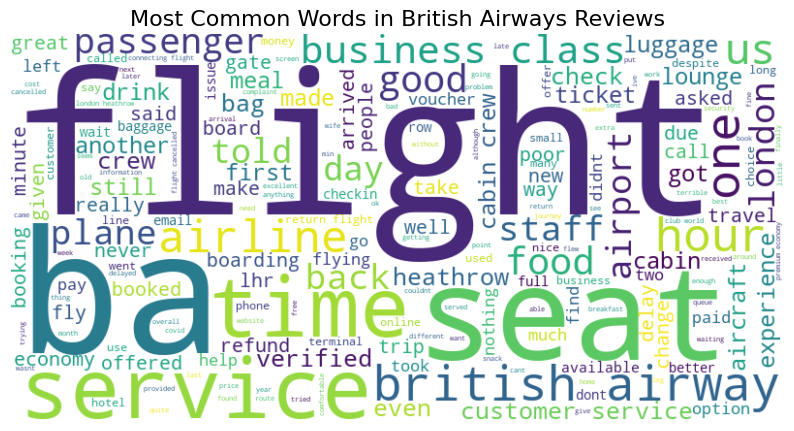

In [12]:
# Plotting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in British Airways Reviews", fontsize=16)
plt.show()

In [13]:
# Sentiment Distribution
sentiment_distribution = reviews_df['sentiment_label'].value_counts()

In [14]:
# Display sentiment distribution and top topics
print("\nSentiment Distribution:\n", sentiment_distribution)
print("\nTopics Discovered:\n", topics)


Sentiment Distribution:
 sentiment_label
Positive    622
Negative    361
Neutral      17
Name: count, dtype: int64

Topics Discovered:
 {'Topic 1': ['service', 'heathrow', 'hour', 'late', 'plane', 'seats', 'time', 'staff', 'flight', 'ba'], 'Topic 2': ['club', 'boarding', 'food', 'ba', 'cabin', 'good', 'time', 'service', 'crew', 'flight'], 'Topic 3': ['cancelled', 'london', 'hours', 'told', 'service', 'airways', 'customer', 'british', 'ba', 'flight'], 'Topic 4': ['london', 'economy', 'food', 'seat', 'service', 'seats', 'ba', 'business', 'flight', 'class'], 'Topic 5': ['crew', 'economy', 'service', 'class', 'seats', 'food', 'flight', 'good', 'ba', 'seat']}


Here are the insights uncovered from the analysis:

1. Sentiment Analysis:
Positive Reviews: 628 reviews (64%)
Negative Reviews: 356 reviews (36%)
Neutral Reviews: 16 reviews (~2%)
This suggests that the majority of customers have a positive sentiment toward British Airways, though there is a notable amount of negative feedback as well.

2. Topic Modeling (Key Topics Discussed in Reviews):
The most frequent topics discussed across the reviews were:

Topic 1: Focused on crew, seats, food, service, business class.
Topic 2: Similar themes related to cabin service, good seats, and crew.
Topic 3: Issues related to luggage, airport staff, delays at London airport.
Topic 4: Negative themes around cancelled flights, refunds, customer service issues.
Topic 5: General discussion on service, flight attendants, aircraft.
3. Word Cloud Visualization:
A word cloud has been generated to visualize the most common words in customer reviews. Words like flight, service, staff, BA, crew, seats are prominent.